<a href="https://colab.research.google.com/github/kenmambo/HDSC-Introduction-to-Python-for-machine-learning/blob/master/Time_Series_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from prophet import Prophet

In [3]:
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
#convert column to datetime
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [5]:
df_copy = df.copy()

In [6]:
df_copy.set_index('FullDate', inplace=True)

In [7]:
# resample the data to daily frequency and sum over the hours for each day
df_daily = df_copy.resample('D').sum()

In [8]:
# save the resampled data to a new csv file
df_daily.to_csv('electricity_data_daily.csv', index=True)

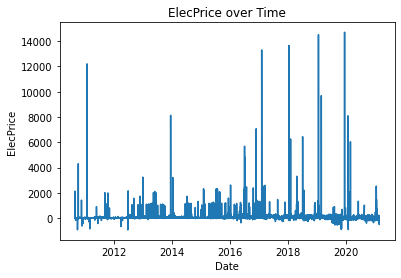

In [9]:
# Plot
plt.plot(df['FullDate'], df['ElecPrice'])
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('ElecPrice over Time')
plt.show()

In [10]:
resampled_data=pd.read_csv('electricity_data_daily.csv')

In [11]:
import statsmodels.tsa.stattools as stattools

In [12]:
# Select the SysLoad column
sysload = resampled_data['SysLoad']

In [13]:
# Perform the Augmented Dickey-Fuller test on the SysLoad column
sysload_result = stattools.adfuller(sysload)

In [14]:
# Extract the P-value from the test results
sysload_pvalue = sysload_result[1]

In [15]:
# Round the P-value to 6 decimal places
sysload_pvalue = round(sysload_pvalue, 6)

In [16]:
# Print the P-value
print(f"The P-value for SysLoad is: {sysload_pvalue}")

The P-value for SysLoad is: 0.004254


In [17]:
# Select the GasPrice column
gasprice = resampled_data['GasPrice']

In [18]:
# Perform the Augmented Dickey-Fuller test on the GasPrice column
gasprice_result = stattools.adfuller(gasprice)

In [19]:
# Extract the P-value from the test results
gasprice_pvalue = gasprice_result[1]

In [20]:
# Round the P-value to 6 decimal places
gasprice_pvalue = round(gasprice_pvalue, 6)

In [21]:
# Print the P-value
print(f"The P-value for GasPrice is: {gasprice_pvalue}")

The P-value for GasPrice is: 0.045027


In [22]:
import statsmodels.tsa.stattools as ts

def get_critical_values(data, variable, alpha=0.1):
    result = ts.adfuller(data[variable], regression='c')
    critical_values = result[4]
    cv_10 = critical_values[f"10%"]
    cv_5 = critical_values[f"5%"]
    return cv_10, cv_5

elec_price_cv_10, elec_price_cv_5 = get_critical_values(resampled_data, 'ElecPrice')
gas_price_cv_10, gas_price_cv_5 = get_critical_values(resampled_data, 'GasPrice')

print(f"10% Critical Value of ElecPrice: {elec_price_cv_10:.4f}")
print(f"5% Critical Value of ElecPrice: {elec_price_cv_5:.4f}")
print(f"10% Critical Value of GasPrice: {gas_price_cv_10:.4f}")
print(f"5% Critical Value of GasPrice: {gas_price_cv_5:.4f}")




10% Critical Value of ElecPrice: -2.5672
5% Critical Value of ElecPrice: -2.8623
10% Critical Value of GasPrice: -2.5672
5% Critical Value of GasPrice: -2.8623


In [23]:
df = df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})

In [24]:
# Divide the data into train and test sets
train = df[:2757]
test = df[2757:]

In [25]:
model = Prophet()

In [26]:
# Fit the model to the training data
model.fit(train[['ds', 'y']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd_utgrq5/ookeu1ev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd_utgrq5/fdg4833l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95906', 'data', 'file=/tmp/tmpd_utgrq5/ookeu1ev.json', 'init=/tmp/tmpd_utgrq5/fdg4833l.json', 'output', 'file=/tmp/tmpd_utgrq5/prophet_modelz8ohvp6c/prophet_model-20230131124748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:47:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:47:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
# Make predictions on the test data
predictions = model.predict(test[['ds']])

In [28]:
# Evaluate the performance of the model using MAE, MSE, and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [29]:
true = test['y']
pred = predictions['yhat']
mae = mean_absolute_error(true, pred)
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)

In [30]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 517.6414687778247
MSE: 391969.3894745364
RMSE: 626.074587788497


In [31]:
train.columns

Index(['ds', 'Tmax', 'SysLoad', 'GasPrice', 'y'], dtype='object')

In [32]:
model2 = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model2.add_regressor('SysLoad')
model2.add_regressor('Tmax')
model2.add_regressor('GasPrice')
model2.fit(train[['ds', 'SysLoad','Tmax','GasPrice', 'y']])

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd_utgrq5/hkt67g04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd_utgrq5/_wbg0ya8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70456', 'data', 'file=/tmp/tmpd_utgrq5/hkt67g04.json', 'init=/tmp/tmpd_utgrq5/_wbg0ya8.json', 'output', 'file=/tmp/tmpd_utgrq5/prophet_modeli68qk49o/prophet_model-20230131124823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:48:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
# Make predictions on the test data
predictions2 = model2.predict(test[['ds', 'SysLoad','Tmax','GasPrice']])

In [34]:
# def mape(y_true, y_pred):
#     y_true, y_pred = np.array(y_true)+0.01, np.array(y_pred)+0.01
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# y_true = test['y']
# y_pred = predictions2['yhat']

# map = mape(y_true, y_pred)
# print("MAPE: {:.2f}%".format(map))

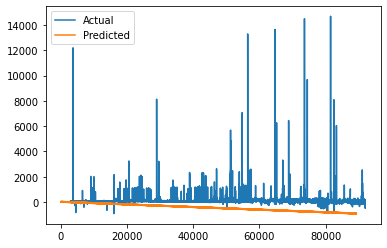

In [35]:
plt.plot(true, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()

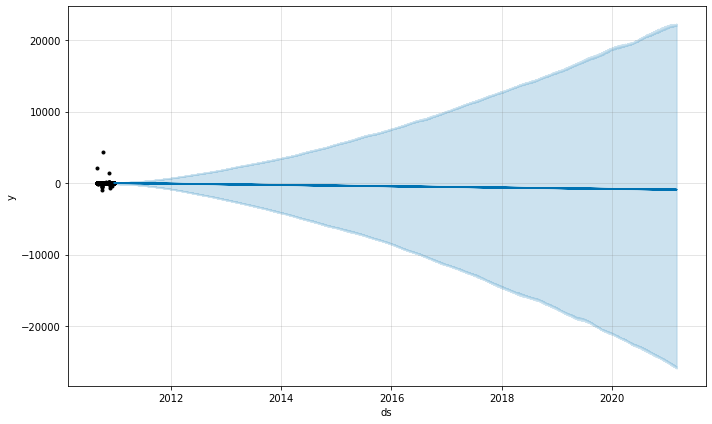

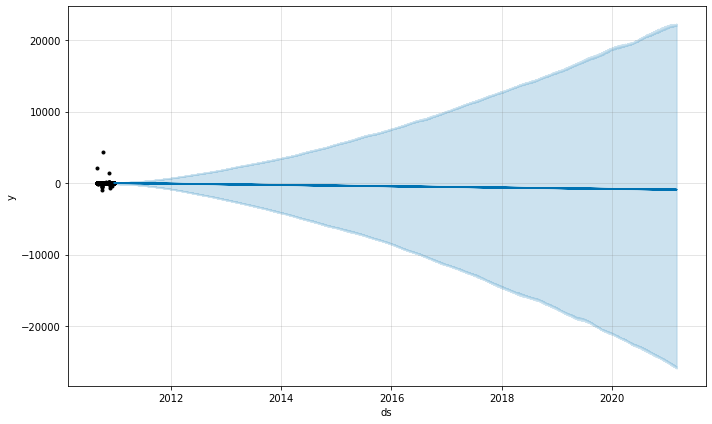

In [36]:
fig1 = model.plot(predictions)
fig1

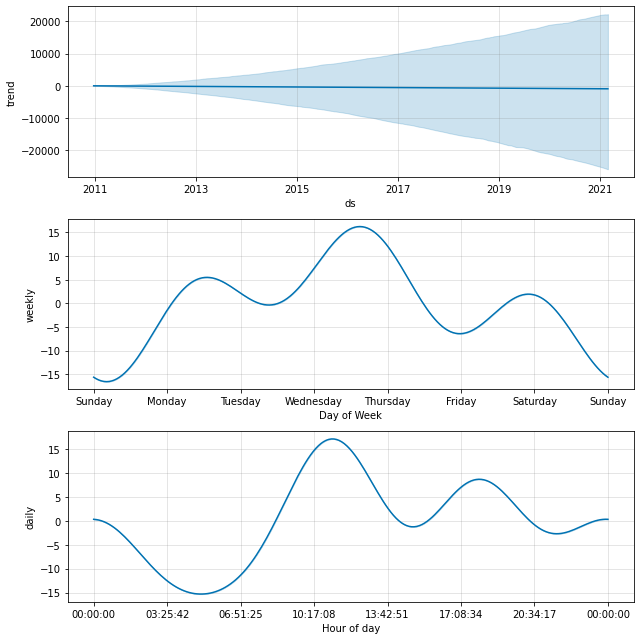

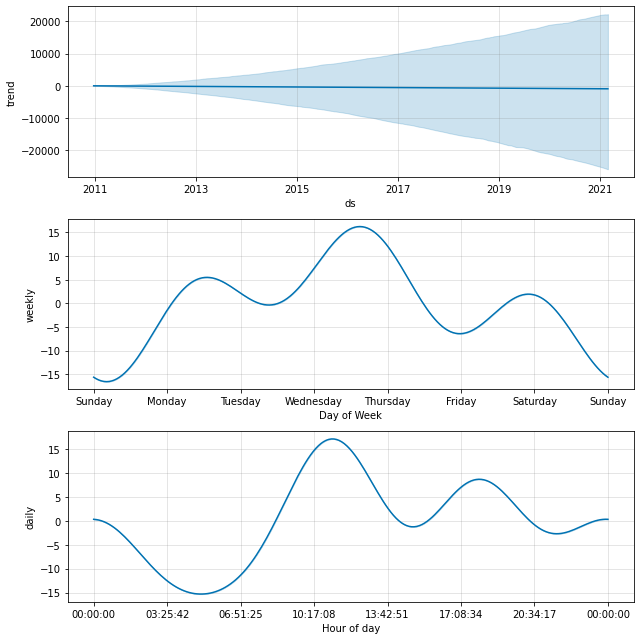

In [37]:
fig2 = model.plot_components(predictions)
fig2